# Problem 2 - NN-model

First we import all the require libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from sklearn.metrics import balanced_accuracy_score
from tensorflow.keras.models import Sequential, save_model, load_model
from keras import optimizers
import tensorflow as tf
from keras.optimizers import SGD

/home/hossein/snap/jupyter/common/lib/python3.7/site-packages/joblib/_multiprocessing_helpers.py:45: UserWarning: [Errno 13] Permission denied.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))


Then by the help of pandas, we input the data set:

In [2]:
df = pd.read_csv("train_set2.csv" , encoding = 'utf-8')
df.head()

,app_id,description_fa,label
0,0,<p>بازی مین روب یک برنامه فکری است که باید مین...,1
1,1,<p>دراین بازی تعدادی عکس برای شما نشان داده می...,1
2,2,<br>تلاش نافرجام برای درک «بوفالو»<br>مرگ پایا...,7
3,3,<p>فیلم نما ، برنامه ای برای دانلود و پخش آنلا...,7
4,4,<p>* این برنامه حاوی بیش از 500 عکس و ژست برای...,7


In [3]:
df.shape

(37899, 3)

Now we make X and Y train:

In [9]:
X_train = df.drop(columns=['app_id'])
Y_train = df['label']
Y_train_array = Y_train.values

In [21]:
Y_train_ca =  keras.utils.to_categorical(Y_train, 10)

In [11]:
def read_fasttext_vecs(fasttext_file):
    with open(fasttext_file, encoding="utf-8") as f:
        c=0
        words = set()
        word_to_vec_map = {}
        for line in f:
            line = line.strip().split()
            curr_word = line[0]
            words.add(curr_word)
            c=c+1
            word_to_vec_map[curr_word] = np.array(line[1:], dtype=np.float64)
        
        i = 1
        words_to_index = {}
        index_to_words = {}
        for w in (words):
            words_to_index[w] = i
            index_to_words[i] = w
            i = i + 1
    return words_to_index, index_to_words, word_to_vec_map

Dictionary mapping words to their fasstest vector representation

In [12]:
word_to_index, index_to_word, word_to_vec_map = read_fasttext_vecs('cc.fa.300.vec')

A function for converting a sentence to the average embedding of words in the sentence:

In [13]:
def sentence_to_avg(sentence, word_to_vec_map):
    words = sentence.split()
    avg = np.zeros((300,))
    for w in words:
        try:
            vec=word_to_vec_map[w]
        except :
            vec=np.zeros((300,))
        avg += vec   
    avg = avg/len(words)
    return avg

Average embedding of words in each row of train and test data as input of the model

In [14]:
avg_train=[]
for i in range(len(X_train)):
    avg_train.append(sentence_to_avg(X_train.description_fa[i],word_to_vec_map))

In [23]:
# MLP model architecture
batch_size = 370
num_classes = 10
epochs = 40
loss_function = 'mean_squared_error'
optimizer = 'adam'
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(300,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
model.summary()
model.compile(loss= loss_function,
              optimizer=optimizer,
              metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               154112    
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                5130      
Total params: 421,898
Trainable params: 421,898
Non-trainable params: 0
_________________________________________________________________


Train the model


In [24]:
history = model.fit(np.array(avg_train), Y_train_ca,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)

Epoch 1/40
103/103 [==============================] - 2s 16ms/step - loss: 0.0750 - accuracy: 0.3921
Epoch 2/40
103/103 [==============================] - 2s 16ms/step - loss: 0.0533 - accuracy: 0.5957
Epoch 3/40
103/103 [==============================] - 2s 16ms/step - loss: 0.0491 - accuracy: 0.6334
Epoch 4/40
103/103 [==============================] - 2s 16ms/step - loss: 0.0470 - accuracy: 0.6534
Epoch 5/40
103/103 [==============================] - 2s 16ms/step - loss: 0.0457 - accuracy: 0.6636
Epoch 6/40
103/103 [==============================] - 2s 16ms/step - loss: 0.0447 - accuracy: 0.6731
Epoch 7/40
103/103 [==============================] - 2s 16ms/step - loss: 0.0441 - accuracy: 0.6791
Epoch 8/40
103/103 [==============================] - 2s 17ms/step - loss: 0.0433 - accuracy: 0.6834
Epoch 9/40
103/103 [==============================] - 2s 16ms/step - loss: 0.0426 - accuracy: 0.6912
Epoch 10/40
103/103 [==============================] - 2s 16ms/step - loss: 0.0422 - accura

Print evaluation of the model on train data


In [26]:
score = model.evaluate(np.array(avg_train), Y_train_ca, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.02745191939175129
Test accuracy: 0.8193092346191406


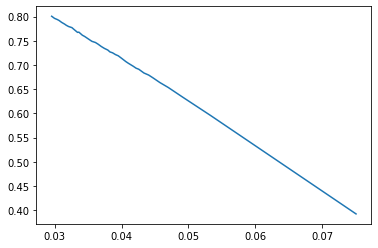

In [27]:
plt.plot(history.history['loss'],history.history['accuracy'])

Now let's Doing it on test dataset:

In [28]:
test_set = pd.read_csv("test_set2.csv" , encoding = 'utf-8')

In [30]:
X_test = test_set.drop(columns=['app_id'])

In [31]:
avg_test=[]
for i in range(len(X_test)):
    avg_test.append(sentence_to_avg(X_test.description_fa[i],word_to_vec_map))

In [32]:
prediction = np.argmax(model.predict(np.array(avg_test)), axis = -1)

In [33]:
df2 = pd.DataFrame(prediction, columns=["label"])
df2

,label
0,3
1,8
2,5
3,9
4,3
...,...
9995,9
9996,9
9997,6
9998,5


In [34]:
df2.insert(column = 'app_id', value = test_set.app_id, loc = 0)

In [103]:
df2

,app_id,label
0,40000,6
1,40001,8
2,40002,5
3,40003,9
4,40004,3
...,...,...
9995,49995,9
9996,49996,9
9997,49997,6
9998,49998,5


In [104]:
df2.to_csv('prediction.csv', index = False)